In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
from sklearn.model_selection import train_test_split

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import recall_score, precision_score

from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
pip install xgboost lightgbm

     --------------------------------------- 89.1/89.1 MB 14.2 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 21.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

## 부스팅boosting
#### <img src='img/boosting.png' width='60%'>
* 배깅처럼 무작위로 표본을 추출해서 분석하는 것보다 
* 약간의 가능성이 높은 규칙들을 결합시켜 
* 보다 정확한 예측모델을 만들어 내는 것을 의미
     + 즉, 약한 모델 여러개를 결합시켜 강한 모델을 만들어 냄
* 배깅은 여러 분류기를 병렬적으로 연결해서 각 분류기로 부터 얻어진 결과를 한번에 모두 고려
     + => 각 분류기가 학습시 상호 영향을 주지 않음
* 부스팅은 순차적으로 연결해서 전 단계 분류기의 결과가 다음 단계 분류기의 학습과 결과에 영향을 미침
* 부스팅 기법 종류
    + AdaBoost      : 가중치 기반 부스팅 기법
    + Gradientboost : 잔여오차 기반 부스팅 기법
    + XGBoost       : GB 개량 부스팅 기법 (추천!)
    + LightGBM      : XGB 개량 부스팅 기법 (추천!)

### 테스트용 데이터 생성 및 분할

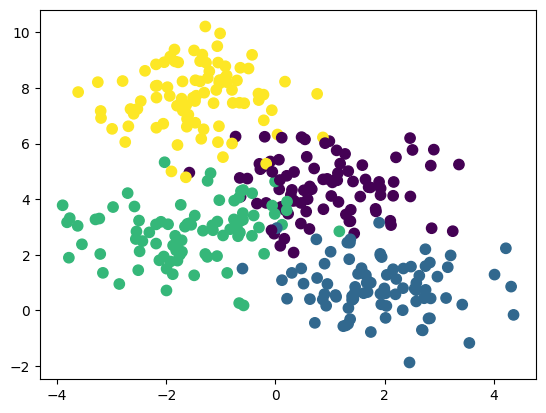

In [19]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=350, centers=4,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:,0], X[:,1], c=y, s=55)
plt.show()

In [20]:
X_train, X_test, Y_train,Y_test = train_test_split(X,y, train_size=0.7, stratify=y, random_state=2211221110)

## AdaBoosting 분석실행

In [21]:
# learning_rate : 학습률
# 가중치 부여 알고리즘
# SAMME.R : soft votting 방식의 가중치 부여 (확률)
# SAMME   : hard votting 방식의 가중치 부여 (값)
adclf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4),
                           n_estimators=100, learning_rate=0.5,algorithm='SAMME.R')
adclf.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=4),
                   learning_rate=0.5, n_estimators=100)

In [22]:
adclf.score(X_train,Y_train)

1.0

In [23]:
pred = adclf.predict(X_test)
accuracy_score(Y_test,pred)

0.8962264150943396

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


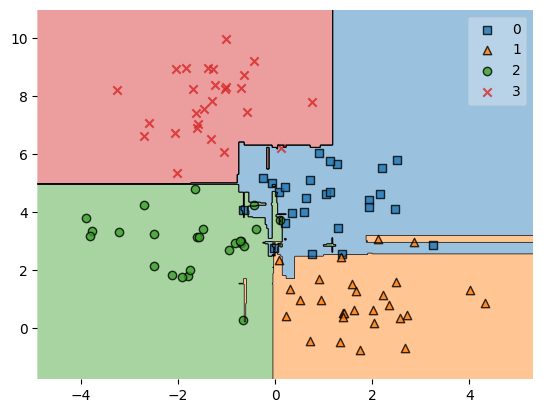

In [24]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_test,pred,adclf)
plt.show()

## GradientBoosting 분석실행

In [28]:
gdclf = GradientBoostingClassifier(max_depth=4, n_estimators=100)
gdclf.fit(X_train,Y_train)

GradientBoostingClassifier(max_depth=4)

In [29]:
gdclf.score(X_train,Y_train)

1.0

In [34]:
pred = gdclf.predict(X_test)
accuracy_score(Y_test,pred)

0.8962264150943396

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


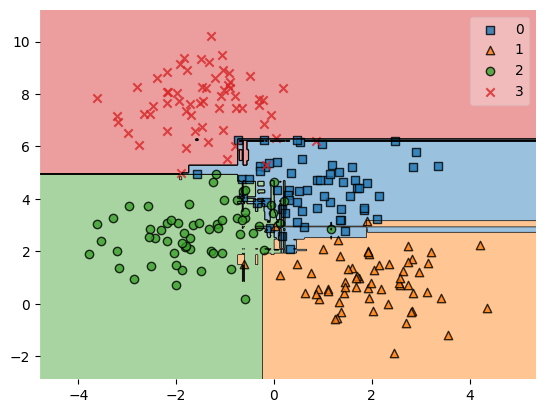

In [36]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X_train,Y_train,gdclf)
plt.show()

## XGBoosting 분석 실행
* 캐글 데이터분석 경진대회 우승자들이 자주 사용했던 분석 기법
* GBM 분석기법 대비 속도와 성능을 향상시킴
* XGBoost 핵심 라이브러리는 C/C++로 작성됨
     + 따라서, sklearn에서 연동하려면 래퍼클래스wrapper class를 사용해야 함
* xgboost.readthedocs.io
* 설치하기 (2020.01.31 기준 v0.90)
     + pip3 install xgboost

In [38]:
import xgboost
xgboost.__version__

'1.7.1'

In [39]:
# objective : 분류 목적 지정
# binary:logistic : 이항분류
# multi:softmax : 다항분류

xgbclf = XGBClassifier(n_estimators=10, max_depth=4, learning_rate=0.5, objective='binary:logistic')

xgbclf.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto', ...)

In [40]:
xgbclf.score(X_train,Y_train)

0.9795081967213115

In [41]:
pred = xgbclf.predict(X_test)
accuracy_score(Y_test,pred)

0.9150943396226415

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


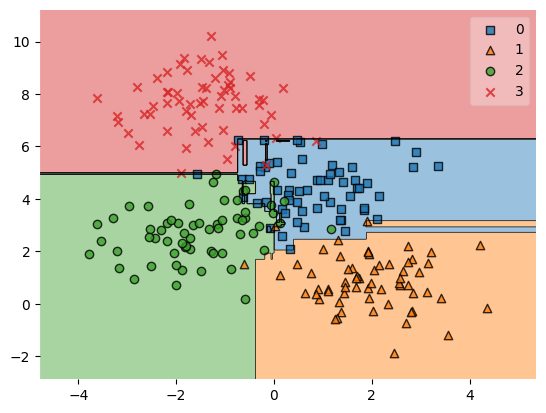

In [42]:
plot_decision_regions(X_train,Y_train,xgbclf)
plt.show()

## LightGBoosting 분석 실행
* 부스팅 계열 분석 알고리즘에서 가장 각광을 받고 있음
* XGB는 다른 알고리즘보다 성능이 좋지만 느리고 메모리를 많이 사용한다는 단점 존재
* 그에 비해 LGB는 속도도 빠르고 메모리도 적게 먹음
     + 즉, XGB의 장점은 수용하고 단점은 보완한 알고리즘임
* lightgbm.readthedocs.io
* 설치하기 (2020.01.31 기준 v2.3.1)
     + pip install lightgbm


In [43]:
import lightgbm
lightgbm.__version__

'3.3.3'

In [67]:
# application : 분류목적 (regression, binary, multiclass)
lgbclf = LGBMClassifier(n_estimators=50, objective='multiclass',
                       learning_rate=0.1, max_depth=4)
lgbclf.fit(X_train,Y_train)

LGBMClassifier(max_depth=4, n_estimators=50, objective='multiclass')

In [68]:
lgbclf.score(X_train,Y_train)

0.9877049180327869

In [69]:
pred = lgbclf.predict(X_test)
accuracy_score(Y_test,pred)

0.9056603773584906

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


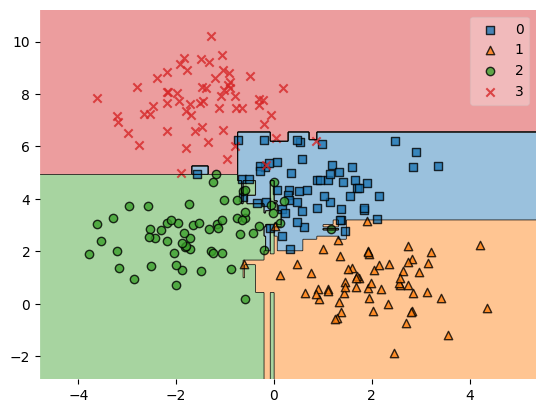

In [70]:
plot_decision_regions(X_train,Y_train,lgbclf)
plt.show()

## CatBoost
* categorical boosting
* catboost.ai
* 범주형 변수들로 구성된 데이터들에 대한 예측에 강점을 보이는 부스팅 모델

In [73]:
!pip install catboost

In [75]:
from catboost import CatBoostClassifier

In [96]:
# iterations : 훈련시 생성할 모델 갯수 - n_estimators과 동일
# cat_features : 범주형 변수 갯수
# plot : 학습과정을 그래프로 시각화
ctclf = CatBoostClassifier(iterations=100, objective='MultiClass',
                       learning_rate=0.1, max_depth=4)
ctclf.fit(X_train,Y_train)

0:	learn: 1.2336759	total: 1.55ms	remaining: 153ms
1:	learn: 1.0994246	total: 2.94ms	remaining: 144ms
2:	learn: 1.0010656	total: 4.26ms	remaining: 138ms
3:	learn: 0.9088567	total: 5.54ms	remaining: 133ms
4:	learn: 0.8307970	total: 6.7ms	remaining: 127ms
5:	learn: 0.7686266	total: 8.12ms	remaining: 127ms
6:	learn: 0.7224107	total: 9.28ms	remaining: 123ms
7:	learn: 0.6750268	total: 10.5ms	remaining: 121ms
8:	learn: 0.6344517	total: 11.8ms	remaining: 119ms
9:	learn: 0.6028361	total: 13ms	remaining: 117ms
10:	learn: 0.5674387	total: 14.3ms	remaining: 115ms
11:	learn: 0.5407760	total: 15.5ms	remaining: 114ms
12:	learn: 0.5147981	total: 17.3ms	remaining: 116ms
13:	learn: 0.4891817	total: 18.6ms	remaining: 114ms
14:	learn: 0.4699650	total: 20.4ms	remaining: 116ms
15:	learn: 0.4494606	total: 22ms	remaining: 116ms
16:	learn: 0.4288479	total: 23.3ms	remaining: 114ms
17:	learn: 0.4103815	total: 24.6ms	remaining: 112ms
18:	learn: 0.3939830	total: 25.8ms	remaining: 110ms
19:	learn: 0.3798939	total:

In [97]:
ctclf.score(X_train,Y_train)

0.9426229508196722

In [98]:
pred = ctclf.predict(X_test)
accuracy_score(Y_test,pred)

0.9150943396226415

C:\Users\LG PC\lib\site-packages\mlxtend\plotting\decision_regions.py:300: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


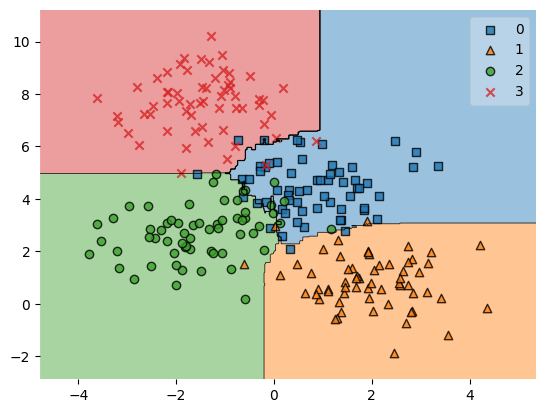

In [99]:
plot_decision_regions(X_train,Y_train,ctclf)
plt.show()

## 과일, 채소 구분하기

## 농구선수 게임데이터를 이용해서 포지션 예측